#  Analysis Part 2: looking at the score

Johann Brehmer, Felix Kling, Kyle Cranmer 2018

In this tutorial we'll demonstrate how to use MadMiner to generate train and test samples for the Information Geometry methods introduced in the following papers:
- J. Brehmer, K. Cranmer, F. Kling, T. Plehn: ["Better Higgs Measurements Through Information Geometry"](https://arxiv.org/abs/1612.05261)
- J. Brehmer, F. Kling, T. Plehn, T.M.P. Tait: ["Better Higgs-CP Tests Through Information Geometry"](https://arxiv.org/abs/1712.02350)

## 0. Preparations

In [1]:
import sys
import os
madminer_src_path = "/Users/felixkling/Documents/GitHub/madminer"
sys.path.append(madminer_src_path)

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.fisherinformation import project_information,profile_information

from madminer.plotting import plot_fisher_information_contours_2d
from madminer.plotting import plot_fisherinfo_barplot
from madminer.plotting import plot_distribution_of_information

from madminer.sampling import SampleAugmenter
from madminer.sampling import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from madminer.ml import MLForge, EnsembleForge

from sklearn.metrics import mean_squared_error


## Define Input File sample

In [2]:
usenamein='100k'
usenameout='scoretest'
nsamples=50000

useinputdata = 'data/madminer_wgamma_observables_'+usenamein+'.h5'
usesamplesdir = 'data/samples_'+usenameout+'/'
usemodelsdir = 'models/samples_'+usenameout+'/'

## 6. Make (unweighted) training and test samples with augmented data

In [3]:
#create sample augmenter
sa = SampleAugmenter(useinputdata, debug=False)

#augment train sample
x, theta, t_xz = sa.extract_samples_train_local(
    theta=constant_benchmark_theta('sm'),
    n_samples=nsamples,
    folder='./'+usesamplesdir,
    test_split=None,
    filename='train'
)

#augment test sample
x, theta, t_xz = sa.extract_samples_train_local(
    theta=constant_benchmark_theta('sm'),
    n_samples=nsamples,
    folder='./'+usesamplesdir,
    test_split=None,
    filename='test',
    switch_train_test_events=True
)


16:59  
16:59  ------------------------------------------------------------
16:59  |                                                          |
16:59  |  MadMiner v2018.11.09                                    |
16:59  |                                                          |
16:59  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
16:59  |                                                          |
16:59  ------------------------------------------------------------
16:59  
16:59  Loading data from data/madminer_wgamma_observables_100k.h5
16:59  Found 2 parameters:
16:59     CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-50.0, 50.0))
16:59     CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-50.0, 50.0))
16:59  Found 6 benchmarks:
16:59     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
16:59     w: CWL2 = 20.00, CPWL2 = 0.00e+00
16:59     morphing_basis_vector_2: CWL2 = -3.84e+01, CPWL2 = -3.77e+01
16:59     morphing_basis_vector_3: CWL2 = 17.32, CPW

## 7. Train a neural network to estimate the score

### 7a) Change Features

In [4]:
#NN Settings
n_hidden = (100,100)
n_epochs = 50
batch_size = 128
initial_lr=0.001
final_lr=0.0001

#Run NN
forge = MLForge()
forge.train(
    method='sally',
    x_filename=usesamplesdir+'x_train.npy',
    t_xz0_filename=usesamplesdir+'t_xz_train.npy' ,
    n_epochs=n_epochs,
    batch_size=batch_size,
    validation_split=None,
    n_hidden=n_hidden,
    initial_lr=initial_lr,
    final_lr=final_lr    
)

#save ensemble
forge.save(usemodelsdir+'sally_test')

16:59  Starting training
16:59    Method:                 sally
16:59    Training data: x at data/samples_scoretest/x_train.npy
16:59                   t_xz (theta0) at  data/samples_scoretest/t_xz_train.npy
16:59    Features:               all
16:59    Method:                 sally
16:59    Hidden layers:          (100, 100)
16:59    Activation function:    tanh
16:59    Batch size:             128
16:59    Trainer:                amsgrad
16:59    Epochs:                 50
16:59    Learning rate:          0.001 initially, decaying to 0.0001
16:59    Validation split:       None
16:59    Early stopping:         True
16:59    Scale inputs:           True
16:59    Regularization:         None
16:59  Loading training data
16:59  Found 50000 samples with 2 parameters and 23 observables
16:59  Rescaling inputs
16:59  Creating model for method sally
16:59  Training model
16:59    Epoch 5: train loss 0.0005 (mse_score: 0.0005)
16:59    Epoch 10: train loss 0.0004 (mse_score: 0.0004)
16:59   

## 8. FisherInfo for Processed Data

16:59  Loading data from data/madminer_wgamma_observables_100k.h5
16:59  Found 2 parameters:
16:59     CWL2 (LHA: dim6 2, maximal power in squared ME: (2,), range: (-50.0, 50.0))
16:59     CPWL2 (LHA: dim6 5, maximal power in squared ME: (2,), range: (-50.0, 50.0))
16:59  Found 6 benchmarks:
16:59     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
16:59     w: CWL2 = 20.00, CPWL2 = 0.00e+00
16:59     morphing_basis_vector_2: CWL2 = -3.84e+01, CPWL2 = -3.77e+01
16:59     morphing_basis_vector_3: CWL2 = 17.32, CPWL2 = -3.12e+01
16:59     morphing_basis_vector_4: CWL2 = 18.05, CPWL2 = 36.80
16:59     morphing_basis_vector_5: CWL2 = -4.97e+01, CPWL2 = 43.29
16:59  Found 23 observables: px_l, px_v, px_a, py_l, py_v, py_a, pz_l, pz_v, pz_a, e_l, e_v, e_a, pt_l, pt_v, pt_a, eta_l, eta_v, eta_a, dphi_lv, dphi_la, dphi_va, m_lv, m_lva
16:59  Found 100000 events
16:59  Found morphing setup with 6 components
17:00  Evaluating rate Fisher information


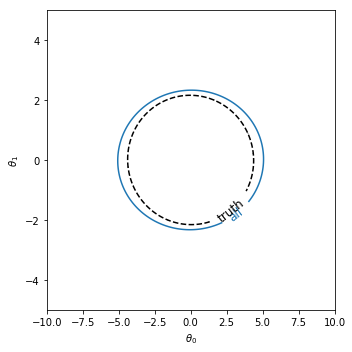

In [5]:
#Setup MadFisher
fisher = FisherInformation(useinputdata, debug=False)

#Run MadFisher
fi_det_mean_all  = fisher.calculate_fisher_information_full_detector(
    theta=[0.,0.], luminosity=300*1000.,
    model_file=usemodelsdir+'sally_test',
    unweighted_x_sample_file=usesamplesdir+'x_test.npy'
)

#Run MadFisher Truth
fi_pl_mean_full , fi_pl_err_full= fisher.calculate_fisher_information_full_truth(theta=[0.,0.],luminosity=300*1000.)

#Plot FisherInfo
fignn = plot_fisher_information_contours_2d(
    [fi_det_mean_all,fi_pl_mean_full],
    [None           ,fi_pl_err_full ],
    colors=[u'C0',"black"],
    linestyles=["solid","dashed"],
    inline_labels=["all","truth"],
    xrange=(-10.,10.),
    yrange=(-5.,5.)
)

## Plot Score Results

In [6]:
#True score
tx_pl_train=np.load(usesamplesdir+'t_xz_train.npy')
t0_pl_train=tx_pl_train.T[0]
t1_pl_train=tx_pl_train.T[1]

tx_pl_test=np.load(usesamplesdir+'t_xz_test.npy')
t0_pl_test=tx_pl_test.T[0]
t1_pl_test=tx_pl_test.T[1]

#ML score 
tx_ml_train=forge.evaluate(usesamplesdir+'x_train.npy')
t0_ml_train=tx_ml_train.T[0]
t1_ml_train=tx_ml_train.T[1]

tx_ml_test=forge.evaluate(usesamplesdir+'x_test.npy')
t0_ml_test=tx_ml_test.T[0]
t1_ml_test=tx_ml_test.T[1]

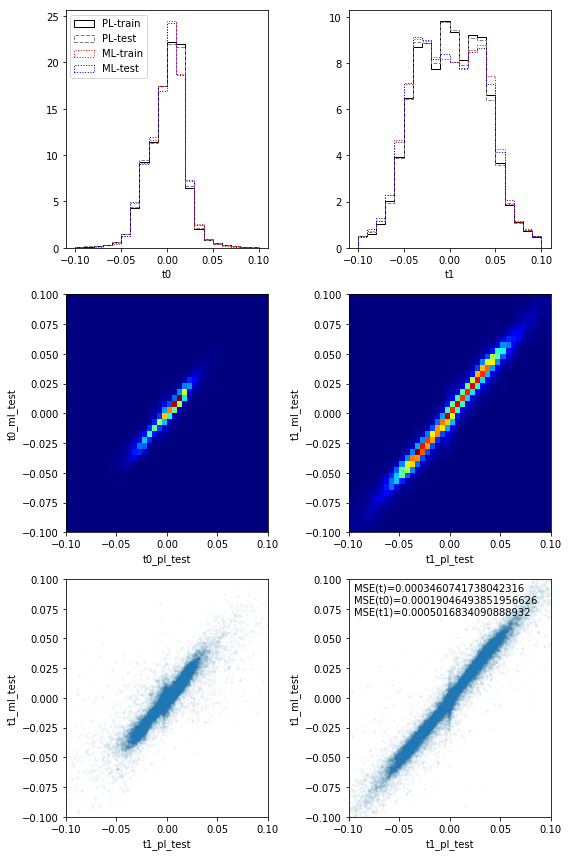

In [7]:
#######
#Figure
myrange=(-.1,.1)
myrangex=[-.1,.1]
f, ((ax11, ax12),(ax21, ax22),(ax31, ax32)) = plt.subplots(3, 2)
f.set_size_inches(8,12)

#######
#Distributions
mynbins=20

#t0
ax11.set_xlabel('t0')
ax11.hist(t0_pl_train, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Black', linestyle='solid', label='PL-train'
        )
ax11.hist(t0_pl_test, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Gray', linestyle='dashed', label='PL-test'
        )
ax11.hist(t0_ml_train, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Red', linestyle='dotted',label='ML-train'
        )
ax11.hist(t0_ml_test, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Blue', linestyle='dotted',label='ML-test'
        )
ax11.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.)

#t1
ax12.set_xlabel('t1')
ax12.hist(t1_pl_train, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Black', linestyle='solid'
        )
ax12.hist(t1_pl_test, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Gray', linestyle='dashed', 
        )
ax12.hist(t1_ml_train, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Red', linestyle='dotted'
        )
ax12.hist(t1_ml_test, 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Blue', linestyle='dotted'
        )

#######
#Density
ax21.hist2d(t0_pl_test, t0_ml_test, bins=(40, 40), range=(myrange,myrange) ,cmap='jet')
ax21.set_xlabel('t0_pl_test')
ax21.set_ylabel('t0_ml_test')

ax22.hist2d(t1_pl_test, t1_ml_test, bins=(40, 40), range=(myrange,myrange) ,cmap='jet')
ax22.set_xlabel('t1_pl_test')
ax22.set_ylabel('t1_ml_test')

#######
#MSE
mse_0 = mean_squared_error(t0_pl_test,t0_ml_test)
mse_1 = mean_squared_error(t1_pl_test,t1_ml_test)
mse_x = mean_squared_error(tx_pl_test,tx_ml_test)

#######
#Scatter
ax31.scatter(t0_pl_test, t0_ml_test,s=3,alpha=0.02)
ax31.set_xlabel('t1_pl_test')
ax31.set_ylabel('t1_ml_test')
ax31.set_xlim(myrangex)
ax31.set_ylim(myrangex)

ax32.scatter(t1_pl_test, t1_ml_test,s=3,alpha=0.02)
ax32.set_xlabel('t1_pl_test')
ax32.set_ylabel('t1_ml_test')
ax32.set_xlim(myrangex)
ax32.set_ylim(myrangex)
plt.text(myrange[0]+0.025*(myrange[1]-myrange[0]), myrange[0]+0.95*(myrange[1]-myrange[0]), 'MSE(t)='+str(mse_x), fontsize=10)
plt.text(myrange[0]+0.025*(myrange[1]-myrange[0]), myrange[0]+0.90*(myrange[1]-myrange[0]), 'MSE(t0)='+str(mse_0), fontsize=10)
plt.text(myrange[0]+0.025*(myrange[1]-myrange[0]), myrange[0]+0.85*(myrange[1]-myrange[0]), 'MSE(t1)='+str(mse_1), fontsize=10)

#######
#Plot
plt.tight_layout()
plt.show()

## Get Kinematic Plots

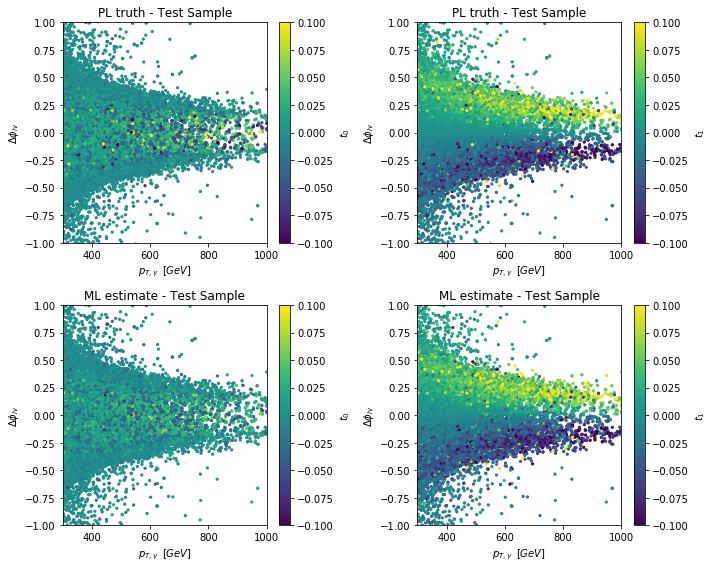

In [8]:
#Which pbservables to show
x_test=np.load(usesamplesdir+'x_test.npy')[:,14]
y_test=np.load(usesamplesdir+'x_test.npy')[:,18]
x_name='$p_{T,\gamma}\;\;[GeV]$'
y_name='$\Delta\phi_{lv}$'
x_range=[300,1000]
y_range=[-1,1]
v_range=[-.1,.1]
t_pl_test=np.load(usesamplesdir+'t_xz_test.npy')
t_ml_test=forge.evaluate(usesamplesdir+'x_test.npy')

#######
#Figure
marker_size=5
f, ((ax11, ax12),(ax21, ax22)) = plt.subplots(2, 2)
f.set_size_inches(10,8)

# t0 PL test
im11=ax11.scatter(x_test, y_test, marker_size, c=t_pl_test[:,0],vmin=v_range[0],vmax=v_range[1])
ax11.set_title("PL truth - Test Sample")
ax11.set_xlabel(x_name)
ax11.set_ylabel(y_name)
ax11.set_xlim(x_range)
ax11.set_ylim(y_range)
cb11=f.colorbar(im11, ax=ax11)
cb11.set_label("$t_0$")

# t1 PL test
im12=ax12.scatter(x_test, y_test, marker_size, c=t_pl_test[:,1],vmin=v_range[0],vmax=v_range[1])
ax12.set_title("PL truth - Test Sample")
ax12.set_xlabel(x_name)
ax12.set_ylabel(y_name)
ax12.set_xlim(x_range)
ax12.set_ylim(y_range)
cb12=f.colorbar(im12, ax=ax12)
cb12.set_label("$t_1$")

# t0 ML test
im21=ax21.scatter(x_test, y_test, marker_size, c=t_ml_test[:,0],vmin=v_range[0],vmax=v_range[1])
ax21.set_title("ML estimate - Test Sample")
ax21.set_xlabel(x_name)
ax21.set_ylabel(y_name)
ax21.set_xlim(x_range)
ax21.set_ylim(y_range)
cb21=f.colorbar(im21, ax=ax21)
cb21.set_label("$t_0$")

# t1 ML test
im22=ax22.scatter(x_test, y_test, marker_size, c=t_ml_test[:,1],vmin=v_range[0],vmax=v_range[1])
ax22.set_title("ML estimate - Test Sample")
ax22.set_xlabel(x_name)
ax22.set_ylabel(y_name)
ax22.set_xlim(x_range)
ax22.set_ylim(y_range)
cb22=f.colorbar(im22, ax=ax22)
cb22.set_label("$t_1$")

#######
#Plot
plt.tight_layout()
plt.show()

In [10]:
fi_det_mean_all

array([[ 0.03896217, -0.00091674],
       [-0.00091674,  0.18502386]])

In [11]:
np.linalg.det(fi_det_mean_all)

0.00720809146938769